<a href="https://colab.research.google.com/github/nhosamani/Machine_Learning/blob/main/AssignmentKNNClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv('/content/house_rental.csv')

In [49]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [50]:
df[df.duplicated()]

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price


In [51]:
df['Sqft']

0      1177.698
1      2134.800
2      1138.560
3      1458.780
4       967.776
         ...   
640    1359.156
641     377.148
642     740.064
643    1707.840
644    1376.946
Name: Sqft, Length: 645, dtype: float64

In [52]:
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [53]:
df.dtypes

Unnamed: 0       int64
Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [54]:
df['Rooms']=df['Bedroom']+df['Living.Room']+df['Bathroom']

In [55]:
df['type']=df['Bedroom'].apply(lambda x:"Duplex" if x>3 else "Not_Duplex")
  

In [56]:
df['type']=df['Rooms'].apply(lambda x:"Duplex" if x>8 else "Not_Duplex")

In [57]:
df['type']=df['Sqft'].apply(lambda x:"Duplex" if x>1000 else "Not_Duplex")
df


,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Rooms,type
0,1,1177.698,2,7,2,2,2,62000,6,Duplex
1,2,2134.800,5,7,4,2,2,78000,8,Duplex
2,3,1138.560,5,7,2,2,1,58000,5,Duplex
3,4,1458.780,2,7,3,2,2,45000,7,Duplex
4,5,967.776,11,14,3,2,2,45000,7,Not_Duplex
...,...,...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000,7,Duplex
641,645,377.148,4,10,1,1,1,24800,3,Not_Duplex
642,646,740.064,13,14,1,1,1,45000,3,Not_Duplex
643,647,1707.840,3,14,3,2,2,65000,7,Duplex


In [58]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [70]:
df['type'].value_counts()

Duplex        468
Not_Duplex    177
Name: type, dtype: int64

In [71]:
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


In [79]:
#for n=8 Neighbors
from sklearn.neighbors import KNeighborsClassifier 
KNN=KNeighborsClassifier(n_neighbors=8)
KNN.fit(X_train,y_train)
y_predict=KNN.predict(X_test)
from sklearn.metrics import classification_report as cr
cr(y_test,y_predict)

'              precision    recall  f1-score   support\n\n      Duplex       0.96      0.97      0.96        97\n  Not_Duplex       0.90      0.88      0.89        32\n\n    accuracy                           0.95       129\n   macro avg       0.93      0.92      0.93       129\nweighted avg       0.95      0.95      0.95       129\n'

In [82]:
train_accuracy =KNN.score(X_train,y_train)
test_accuracy=KNN.score(X_test,y_test)

print("train_accuracy is",train_accuracy)
print("test_accuracy is",test_accuracy)

train_accuracy is 0.936046511627907
test_accuracy is 0.9457364341085271


In [ ]:
# Selecting the right Neighbor 

neighbor=np.arange(1,9)
train_acc=np.empty(len(neighbor))
test_acc=np.empty(len(neighbor))

for i,j in enumerate(neighbor):
  KNN=KNeighborsClassifier(n_neighbors=j)
  KNN.fit(X_train,y_train)

  train_acc[i]=KNN.score(X_train,y_train)
  test_acc[i]=KNN.score(X_test,y_test)

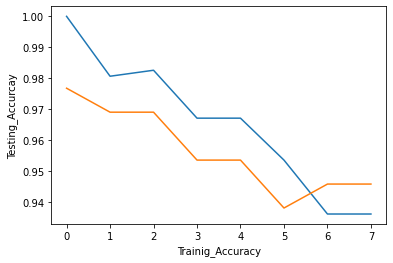

In [85]:
plt.plot(train_acc)
plt.plot(test_acc)
plt.xlabel('Trainig_Accuracy')
plt.ylabel('Testing_Accurcay')
plt.show()

In [89]:
print("Referring to the graph we can say that \nboth the training and testing Accuracy can be achieved\nby the in the model when Neighbor size is somewhere between 5 and 6")

Referring to the graph we can say that 
both the training and testing Accuracy can be achieved
by the in the model when Neighbor size is somewhere between 5 and 6
